# Importing Libraries

In [5]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from numpy import sin, cos, exp, pi

____

# Gradient descent function
The below function is a general gradient-descent optimizer. It takes an initial guess and the derivative of the function.

In [6]:
def optimize(fd, init_guess, lr, iterations):
    """
    Optimize a function through gradient descent, and return
    the list of visited points.
    
    `fd` - derivative of function to optimize
    `init_guess` - initial guess for the point
    `lr` - learning rate
    `iterations` - number of steps to perform
    """
    
    p_arr = [init_guess]
    
    for _ in range(iterations):
        p_arr.append(p_arr[-1] - lr * fd(*p_arr[-1]))
    
    return np.array(p_arr)

____

# Animation functions

## 2D

In [10]:
def animate_descent_2d(f, fd, xmin, xmax, lr=0.1, iterations=100):
    """
    Animate the gradient descent of a function using a 2D plot
    """
    # generate a plot of `f`
    xr = np.linspace(xmin, xmax, 100)
    fig, ax = plt.subplots()
    ax.plot(xr, f(xr))

    # create an initial guess
    init_guess = np.array(
        [np.random.rand() * (xmax - xmin) + xmin]
    )

    lnall, = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)

    # get a list of visited points
    points = optimize(fd, init_guess, lr, iterations)
    z_values = [f(*points[i]) for i in range(len(points))]
    print(f"best point is {points[-1]}")

    # now animate
    def update(frame):
        lngood.set_data([points[frame][0]], [f(*points[frame])])
        lnall.set_data(
            points[:frame+1],
            z_values[:frame+1]
        )

    ani = FuncAnimation(
        fig,
        update,
        frames=range(len(points)),
        interval=20,
        repeat=False
    )

    plt.show()

## 3D

In [ ]:
def animate_descent_3d(f, fd, pmin, pmax, lr=0.1, iterations=100):
    """
    Animate the gradient descent of a function using a 3D plot
    """
    # generate  graph of `f`
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    # create a mesh of points in the region specified
    pspace = np.linspace(pmin, pmax, 100)
    xr, yr = np.meshgrid(*np.linspace(pmin, pmax, 100).transpose())

    # plot it
    ax.plot_surface(xr, yr, f(xr, yr), linewidth=0)

    # create an initial random guess
    init_guess = np.random.rand() * (pmax - pmin) + pmin

    lnall, = ax.plot([], [], [], 'ro')
    lngood, = ax.plot([], [], [], 'go', markersize=10)

    # get a list of points visited
    points = optimize(fd, init_guess, lr, iterations)
    z_values = [f(*points[i]) for i in range(len(points))]
    print(f"best point is {points[-1]}")

    # animate it
    def update(frame):
        lngood.set_data([points[frame][0]], [points[frame][1]])
        lngood.set_3d_properties(z_values[frame])

        lnall.set_data(points[:frame+1, 0], points[:frame+1, 1])
        lnall.set_3d_properties(z_values[:frame+1])

    ani = FuncAnimation(
        fig,
        update,
        frames=range(len(points)),
        interval=20,
        repeat=False
    )

    plt.show()

____

# Given testcases

## Case 1

In [11]:
def f1(x):
    return x ** 2 + 3 * x + 8

def f1d(x):
    return 2 * x + 3

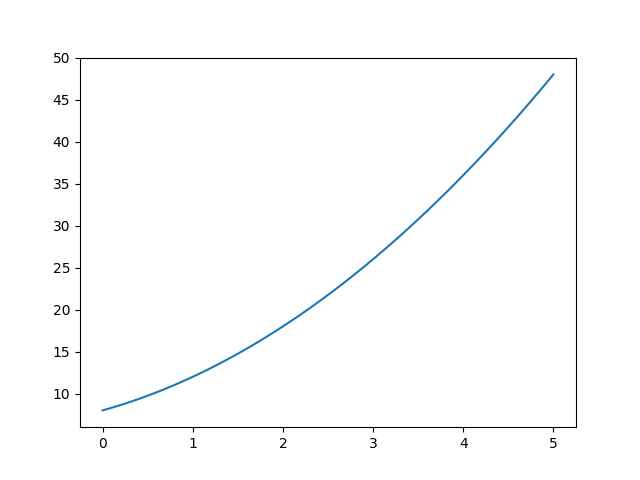

/home/ninja/.local/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [12]:
animate_descent_2d(f1, f1d, -5, 5)

## Case 2

In [ ]:
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

def f3d(x, y):
    return np.array([df3_dx(x, y), df3_dy(x, y)])

In [ ]:
animate_descent_3d(
    f3,
    f3d,
    np.array([-10, -10]),
    np.array([10, 10])
)

## Case 3

In [ ]:
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4d(x, y):
    return np.array([f4_dx(x, y), f4_dy(x, y)])

In [ ]:
animate_descent_3d(
    f4,
    f4d,
    np.array([-pi, -pi]),
    np.array([pi, pi]),
    iterations=1000
)

## Case 4
We can numerically differentiate the given function:

In [ ]:
def differentiate(f, dx):
    def wrapper(x):
        return (f(x + dx) - f(x)) / dx
    return wrapper

In [ ]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

f5d = differentiate(f5, 0.001)

In [ ]:
animate_descent_2d(
    f5,
    f5d,
    0,
    2 * pi,
    lr=0.01
)